This is the google colab notebook for HWK #2 for stats315

In [ ]:
# ======================= WORKING COPY ========================
## This cell is the code for the Forward Stepwise function and the subfunctions it cells ##

Preprocess = function(X){

  X_preprocessed = X 

  # binarize the first 54 features 
  # if the value is above zero, set it equal to 1
  # if the value is below zero, set it equal to 0 
  X_preprocessed[,1:54] = ifelse(X[,1:54] > 0, 1, 0)

  # take the log transform of the last 3 features 
  X_preprocessed[,55:57] = log(X[,55:57])

  # mean center the data 
  X_preprocessed = scale(X_preprocessed, scale=FALSE)

  return(X_preprocessed) 
}

# calculate the projection of x_k onto the span of X_1 (using Q_1) 
Projection = function(x_k, Q_1){
  
  # initialize the projection vector, P, to be all zeros 
  P = rep(0, nrow(Q_1))

  # take (inner product of x_k with each column of Q_1) multiplied by that column 
  for (q in 1:ncol(Q_1)){
    w_q = Q_1[,q]
    inner_prod = sum(x_k*w_q) 
    projection = as.vector(inner_prod) * w_q
    P = P + projection
  }
  return(P) 
}

# calculate the residual vector 
Residual_Vec = function(x_k, P){
  r_k = x_k - P # calculate the residual 
  w_k = r_k / norm(matrix(r_k)) # make the residual a unit vector 
  return(w_k) 
}

# calculate the RSS 
RSS_Calc = function(y, w_k){
  return((y %*% w_k)**2)
}

# X: Training data 
# Y: Training labels 
# param_index: list of indices of parameters we are still considering 
Per_Parameter = function(X, y, param_index){

  # calculate X_1 (the columns of X that are already in our model) 
  X_1 = X[,param_index] # X[,-param_index] 

  # calculate QR decomopsition 
  QR_decomp = qr(X_1)
  Q_1 = qr.Q(QR_decomp)
  
  # try every parameter, k, that we are considering to add to our model 
  # Note: if there's just 1 parameter left, we can return it
  if (length(param_index) == 1){  

    return(param_index[1]) 

  } else {

    # keep track of residuals 
    residuals = c()

    for (k in param_index){
      x_k = X[,k] # get the kth column of X_1  
      P = Projection(x_k, Q_1) # project x_k onto the span of X_1 (using Q_1)
      w_k = Residual_Vec(x_k, P) # calculate the residual 
      residuals = append(residuals, RSS_Calc(y, w_k)) # calculate the RSS 
    }
    
    # find the index of the parameter with the max 
    max_param_index = param_index[(which.max(residuals))]

    return (max_param_index)
  }

}

# given a model summary, it extracts all the coefficients
# and returns them as a list 
get_coeffs = function(summary){
  coeffs = c() 
  for (response in summary){
    coeffs = append(coeffs, response$coefficients[2])
  }
  return(coeffs)
}

# X: training data (n x p matrix)
# y: training labels (1 x p vector)
# p: the number of parameters that we want to fit 

Forward_Stepwise = function(X, y){

  num_params = ncol(X) # total number of parameters we have 
  num_obs = nrow(X) # total number of observations we have 
  X = cbind(rep(1, num_obs), X) # add an intercept to our model 
  param_index = 2:(num_params + 1) # indices of each parameter 
  parameter_order = c() # store the final order of parameters to add 

  coeffs = matrix(rep(0, len=(num_params)*(num_params)), nrow=(num_params)) # store the coefficients at each step 

  for (i in 1:num_params){
    
    # get the best parameter (that maximizes RSS) 
    max_param_index = Per_Parameter(X, y, param_index)

    # add this parameter to our running list 
    # Note: decrement by one so the parameters correspond 
    # to original columns of X (before adding the intercept)
    parameter_order = append(parameter_order, max_param_index - 1)

    # update the set of paramters we are still considering 
    param_index = param_index[param_index != max_param_index] 

    X_train = X[,parameter_order] # assign our new data order 
    fitted_model = lm(X_train ~ y) # train a linear regression model 

    # store the coefficients in a matrix 
    # each row is a successive iteration 
    if(i==1){
      coeffs[1,1] = summary(fitted_model)$coefficients[2]
    } else {
      coeffs[i,1:i] = get_coeffs(summary(fitted_model))
    }

  } 

  return_list = list('coeffs' = coeffs, 'order' = parameter_order)
  return(return_list)
}


In [ ]:
# load in spam data 
spam_data = read.table("/spam.data")
spam_y = spam_data[,58]
spam_X = data.matrix(spam_data[,1:57])
spam_X = Preprocess(spam_X) 

# load in the test indicator 
test_ind = read.table("/spam.traintest") 
test_ind = test_ind == 1 # indices belonging to the test set (as booleans)
train_ind = test_ind == 0 # indices beloning to the training set (as booleans)

# split the training and test data 
spam_X_train = spam_X[train_ind,]
spam_X_test = spam_X[test_ind,]
spam_y_train = spam_y[train_ind]
spam_y_test = spam_y[test_ind]

In [ ]:
## This cell is the code for the Forward Stepwise function and the subfunctions it cells ##

Preprocess = function(X){

  X_preprocessed = X 

  # binarize the first 54 features 
  # if the value is above zero, set it equal to 1
  # if the value is below zero, set it equal to 0 
  X_preprocessed[,1:54] = ifelse(X[,1:54] > 0, 1, 0)

  # take the log transform of the last 3 features 
  X_preprocessed[,55:57] = log(X[,55:57])

  # mean center the data 
  X_preprocessed = scale(X_preprocessed, scale=FALSE)

  return(X_preprocessed) 
}

# calculate the projection of x_k onto the span of X_1 (using Q_1) 
Projection = function(x_k, Q_1){
  
  # initialize the projection vector, P, to be all zeros 
  P = rep(0, nrow(Q_1))

  # take (inner product of x_k with each column of Q_1) multiplied by that column 
  for (q in 1:ncol(Q_1)){
    w_q = Q_1[,q]
    inner_prod = sum(x_k*w_q) 
    projection = as.vector(inner_prod) * w_q
    P = P + projection
  }
  return(P) 
}

# calculate the residual vector 
Residual_Vec = function(x_k, P){
  r_k = x_k - P # calculate the residual 
  w_k = r_k / norm(matrix(r_k)) # make the residual a unit vector 
  return(w_k) 
}

# calculate the RSS 
RSS_Calc = function(y, w_k){
  return(sum(y*w_k)**2)
}

# X: Training data 
# Y: Training labels 
# param_index: list of indices of parameters we are still considering 
Per_Parameter = function(X, y, param_index){

  # calculate X_1 (the columns of X that are already in our model) 
  X_1 = X[,-param_index] 

  # calculate QR decomopsition 
  QR_decomp = qr(X_1)
  Q_1 = qr.Q(QR_decomp)
  
  # try every parameter, k, that we are considering to add to our model 
  # Note: if there's just 1 parameter left, we can return it
  if (length(param_index) == 1){  

    return(param_index[1]) 

  } else {

    # keep track of residuals 
    residuals = c()

    for (k in param_index){
      x_k = X[,k] # get the kth column of X_1  
      P = Projection(x_k, Q_1) # project x_k onto the span of X_1 (using Q_1)
      w_k = Residual_Vec(x_k, P) # calculate the residual 
      residuals = append(residuals, RSS_Calc(y, w_k)) # calculate the RSS 
    }
    
    # find the index of the parameter with the max 
    max_param_index = param_index[(which.max(residuals))]

    return (max_param_index)
  }

}

# given a model summary, it extracts all the coefficients
# and returns them as a list 
get_coeffs = function(summary){
  coeffs = c() 
  for (response in summary){
    coeffs = append(coeffs, response$coefficients[2])
  }
  return(coeffs)
}

# X: training data (n x p matrix)
# y: training labels (1 x p vector)
# p: the number of parameters that we want to fit 

Forward_Stepwise = function(X, y){

  num_params = ncol(X) # total number of parameters we have 
  num_obs = nrow(X) # total number of observations we have 
  X = cbind(rep(1, num_obs), X) # add an intercept to our model 
  param_index = 2:(num_params + 1) # indices of each parameter 
  parameter_order = c() # store the final order of parameters to add 

  coeffs = matrix(rep(0, len=(num_params)*(num_params)), nrow=(num_params)) # store the coefficients at each step 

  for (i in 1:num_params){
    
    # get the best parameter (that maximizes RSS) 
    max_param_index = Per_Parameter(X, y, param_index)

    # add this parameter to our running list 
    # Note: decrement by one so the parameters correspond 
    # to original columns of X (before adding the intercept)
    parameter_order = append(parameter_order, max_param_index - 1)

    # update the set of paramters we are still considering 
    param_index = param_index[param_index != max_param_index] 

    X_train = X[,parameter_order] # assign our new data order 
    fitted_model = lm(X_train ~ y) # train a linear regression model 

    # store the coefficients in a matrix 
    # each row is a successive iteration 
    if(i==1){
      coeffs[1,1] = summary(fitted_model)$coefficients[2]
    } else {
      coeffs[i,1:i] = get_coeffs(summary(fitted_model))
    }

  } 

  return_list = list('coeffs' = coeffs, 'order' = parameter_order)
  return(return_list)
}


In [ ]:
# predict on test data 
stepwise_predict = function(model, X_0){

  # re arrange coefficient order to match the order parameters were added 
  coeffs = model$coeffs[,model$order]

  m = nrow(X_0)
  p = ncol(X_0)

  prediction_matrix = matrix(rep(0, len=m*p), nrow=m) 

  for (j in 1:p){

    step_j_coeffs = coeffs[j,]
    step_j_preds = c() 

    for (data_point in 1:m){
      pred = sum(step_j_coeffs*X_0[data_point,]) 
      step_j_preds = append(step_j_preds, pred)
    }
    prediction_matrix[,j] = step_j_preds
  }

  return(prediction_matrix) 

 } 

In [ ]:
# plot test error 
plot_test_error = function(prediction_matrix, spam_y_test){
  
  spam_y_test = data.matrix(spam_y_test) # convert test labels to numeric 
  test_errors = c() # store test errors 

  for (j in 1:ncol(prediction_matrix)){
    test_errors = append(test_errors, norm(spam_y_test - prediction_matrix[,j]))
  }

  step = 1:ncol(prediction_matrix)
  plot(step, test_errors, type='l')
}

[1]  7 24 22 52 53 25 46 55 27 16 48 42 21 37  5 44 34 13  8 31 14  4 12 57 54
[26] 17  1 45 33 32 19 23 11 47 39 43 28 35 10  3 51  9 36  2 15 41 38 56 20 50
[51] 26 30 18  6 40 49 29

-0.04360466,-0.06560459,-0.1119708,-0.1100916,-0.1511761,-0.2090721,-0.2017533,-0.1377513,-0.1184441,-0.1301762,⋯,1.23831775,1.64908634,1.67496831,1.68597435,1.68733435,1.87448846,1.78143080,1.79770386,1.80039926,1.823168197
-0.04360466,-0.06560459,0.3589580,0.3608372,0.8823412,1.1796179,1.1549579,1.2189599,1.2382671,1.2265350,⋯,2.61871056,3.66223903,3.64425988,3.65526592,3.65662592,3.84378003,3.75072237,3.67613091,3.67882631,3.559064823
-0.04360466,-0.06560459,-0.1119708,-0.1100916,-0.1511761,0.1461007,0.1214406,0.1854426,0.2047499,0.1930177,⋯,0.98348550,2.00074416,1.98276500,1.99377104,1.99513104,2.18228515,2.08922749,2.10550055,2.10819595,1.988434462
-0.04360466,0.24394189,0.1975757,0.1994549,0.7209589,0.6630629,0.6384029,0.7024049,0.7217121,0.7099800,⋯,2.57580082,2.87984960,2.86187044,2.87287648,2.87423648,3.06139059,2.96833293,2.98460599,2.98730139,3.010070326
-0.04360466,-0.06560459,-0.1119708,-0.1100916,-0.1511761,-0.2090721,-0.2017533,-0.1377513,-0.1184441,-0.1301762,⋯,1.24152743,1.65229602,1.63431687,1.64532290,1.64668291,1.83383702,1.74077935,1.75705242,1.75974782,1.782516753
-0.04360466,-0.06560459,-0.1119708,-0.1100916,-0.1511761,-0.2090721,-0.2017533,-0.1377513,-0.1184441,-0.1301762,⋯,-0.26268901,-0.51266354,-0.48678157,-0.47577553,-0.47441553,-0.28726142,-0.38031909,-0.36404602,-0.36135062,-0.338581686
-0.04360466,-0.06560459,-0.1119708,-0.1100916,-0.1511761,-0.2090721,-0.2017533,-0.1377513,-0.1184441,-0.1301762,⋯,-0.17354031,-0.04746675,-0.06544591,-0.05443987,-0.05307987,0.13407424,0.04101658,-0.03357488,-0.03087948,-0.008110542
-0.04360466,-0.06560459,-0.1119708,-0.1100916,0.4114124,0.3535164,0.3608352,0.4248372,0.4441444,0.4324123,⋯,-0.23830881,-0.65907709,-0.67705624,-0.66605021,-0.66469020,-0.47753609,-0.57059376,-0.55432069,-0.55162529,-0.528856358
-0.04360466,-0.06560459,-0.1119708,-0.1100916,-0.1511761,-0.2090721,-0.2017533,-0.3520695,-0.3327622,-0.3444944,⋯,-1.12925444,-1.30252824,-1.32050739,-1.30950136,-1.30814136,-1.42280851,-1.51586618,-1.49959311,-1.49689771,-1.474128776
-0.04360466,-0.06560459,-0.1119708,-0.1100916,-0.1511761,-0.2090721,-0.2017533,-0.3520695,-0.3327622,-0.3444944,⋯,-1.07018412,-1.15565786,-1.17363701,-1.16263098,-1.16127097,-0.97411686,-1.06717453,-1.05090147,-1.04820606,-1.025437129
-0.04360466,-0.06560459,-0.1119708,-0.1100916,-0.1511761,-0.2090721,-0.2017533,-0.1377513,-0.1184441,-0.1301762,⋯,0.07558648,0.51039886,0.49241970,0.50342574,0.50478574,0.69193985,0.59888219,0.61515525,0.61785065,0.498089163


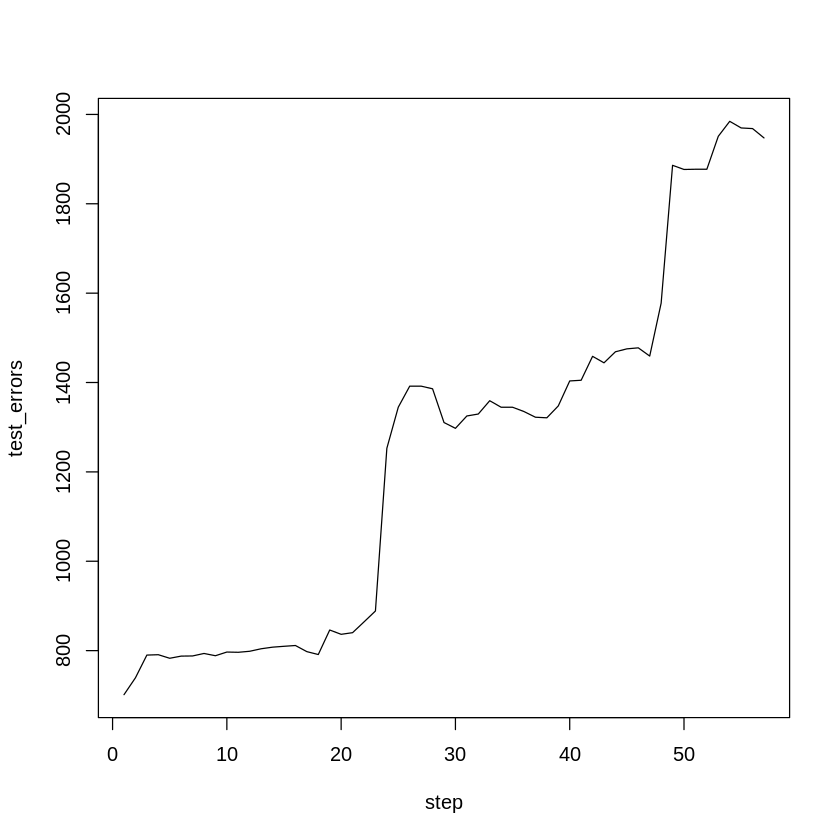

In [ ]:
# train model 
model = Forward_Stepwise(spam_X_train, spam_y_train) 
model$order

# predict on test data 
prediction_matrix = stepwise_predict(model, spam_X_test)
prediction_matrix 

# plot test error
plot_test_error(prediction_matrix, spam_y_test)

a) When centering the data in X, we are not scaling the data but rather linearly changing all of them so that the data is centered about the mean. Therefore since the scale of the data is not changed, the regression coefficients do not change. However, the intercept will change and if it is mean centered, the intercept will be 0

b) We would simply iterate through the Z, and try to fit one of the leftover predictors to X_s using least squares. After generating linear regression models for each of the individual leftover predictors, we would simply see which model has the smallest RSS (r_s in this problem) and then simply choose that parameter to include in our model

c) In our workflow, we will start with our mean centered data (i.e. take the average value of all the values and subtract it from every single value in the dataset to ensure a y-intercept of zero). From that point forward, we will follow the workflow in 2b; iterate through the leftover paramters and fit a linear regression to it. We will then compare the respective RSS of each fit and the parameter whose fit gives the smallest RSS will be chosen. The residuals of this fit will then be fed into the next iteration at which a different parameter will be selected in this manner. 

Explicitly, we can leverage QR decomposition for a fast forward-stepwise selection. Let us assume that X = (x1, x2, x3, x4 ...). Suppose we have the QR decomposition of X = QR where Q = (w1, w2 .... wq) and R is an upper triangular matrix. q is the current number of paramters already fit, and p is the total number of paramters. Let us evaluate xk where q < k <- p. The projection of x_k onto the span(X) is P(xk) which is


Step 1) P(xk) = <xk,w1>w1 + ... <xk,wq>wq.


Step 2) Let rk = xj - P(xk) and wk = rk/||rk||


If we had xk into the set of predictors, the fitted values become


y^_1 + <y,wk>wk and therefore the best additional parameter will maximize this quantity


Step 3) <y,wk>**2

We can just keep cycling through steps 1 and 3 to keep adding one more predictor to keep going

In [ ]:
#Problem 2 - Coding
#2D

#Perform a QR decomposition of our input matrix X

#This is just a random X matrix to show that this works


Q_calc = function(X){
  QR_decomp = qr(X)
  Q <- qr.Q(QR_decomp)
  return(Q)
}

R_calc = function(X){
  QR_decomp = qr(X)
  R <- qr.R(QR_decomp)
  return(R)
}

Projection = function(x_k,Q){
  q = ncol(Q)
  P = rep(0, nrow(Q))
  for (i in 1:q){
    scalar = ((c(x_k%*%Q[,i])))
    updated = scalar*Q[,i]
    P = P + updated
  }
  return(P)
}

Residual_Vec = function(x_k,P){
  r_k = x_k - P
  w_k = r_k/norm(matrix(r_k))
  return(w_k)
}

RSS_Calc = function(Y, w_k){
  return((Y%*%w_k)**2)
}

Per_Parameter = function(X,Y,param_index){
  Q = Q_calc(X[,param_index])
  R = R_calc(X[,param_index])
  residuals = c()
  
  if (length(param_index) > 1){
    for (i in param_index){
      x_k = X[,i]
      P = Projection(x_k,Q)
      w_k = Residual_Vec(x_k,P)
      residuals = append(residuals, RSS_Calc(Y, w_k))
    }
    #print(residuals)
    max_param_index = param_index[(which.max(residuals))]
  }
  else{
    max_param_index = param_index[1]
  }
  return (max_param_index)
}

Forward_Stepwise = function(X,Y){
  num_params = ncol(X)
  parameter_order = c()
  param_index = c(1:ncol(X))

  for (i in 1:num_params){
    max_param_index = Per_Parameter(X,Y, param_index)
    parameter_order = append(parameter_order, max_param_index)
    param_index <- param_index[ param_index != max_param_index]
  }
  return(parameter_order)
}


#Practice
#X <- matrix(runif(24), 6)
#Y <- rep(1, 6)

spam_data <- read.table("/spam.data")
spam_X = data.matrix(spam_data[,1:57])
spam_Y = spam_data[,58]

(Forward_Stepwise(spam_X,spam_Y))


library(tidyverse)
library(caret)
library(leaps)
library(MASS)
library(olsrr)

#full.model <- lm(V58 ~ .,data = spam_data)
#step.model <- stepAIC(full.model, direction = "forward", 
#                      trace = FALSE)
#step.model$anova

regfit.fwd=regsubsets(V58 ~ .,data = spam_data, method ="forward")
summary(regfit.fwd)




model <- lm(V58 ~ .,data = spam_data)
ols_step_forward_p(model)



[1]  1  7  5  3  6  9  4 11 18 16 52  8 21 10 17 53 20 55 56 13 23 19 24 12 15
[26]  2 22 54 14 50 57 49 45 40 37 51 43 47 26 38 31 36 33 28 34 39 35 44 46 30
[51] 32 48 25 42 29 27 41

Subset selection object
Call: regsubsets.formula(V58 ~ ., data = spam_data, method = "forward")
57 Variables  (and intercept)
    Forced in Forced out
V1      FALSE      FALSE
V2      FALSE      FALSE
V3      FALSE      FALSE
V4      FALSE      FALSE
V5      FALSE      FALSE
V6      FALSE      FALSE
V7      FALSE      FALSE
V8      FALSE      FALSE
V9      FALSE      FALSE
V10     FALSE      FALSE
V11     FALSE      FALSE
V12     FALSE      FALSE
V13     FALSE      FALSE
V14     FALSE      FALSE
V15     FALSE      FALSE
V16     FALSE      FALSE
V17     FALSE      FALSE
V18     FALSE      FALSE
V19     FALSE      FALSE
V20     FALSE      FALSE
V21     FALSE      FALSE
V22     FALSE      FALSE
V23     FALSE      FALSE
V24     FALSE      FALSE
V25     FALSE      FALSE
V26     FALSE      FALSE
V27     FALSE      FALSE
V28     FALSE      FALSE
V29     FALSE      FALSE
V30     FALSE      FALSE
V31     FALSE      FALSE
V32     FALSE      FALSE
V33     FALSE      FALSE
V34     FALSE      FALSE


                             Selection Summary                               
----------------------------------------------------------------------------
        Variable                  Adj.                                          
Step    Entered     R-Square    R-Square      C(p)          AIC        RMSE     
----------------------------------------------------------------------------
   1    V21           0.1469      0.1467    4210.3127    5742.5082    0.4514    
   2    V23           0.2318      0.2315    3335.6088    5262.0816    0.4284    
   3    V7            0.3048      0.3043    2584.0036    4804.6817    0.4076    
   4    V57           0.3415      0.3409    2207.3348    4557.2879    0.3967    
   5    V16           0.3753      0.3746    1859.8222    4316.4462    0.3865    
   6    V52           0.4015      0.4008    1591.2379    4121.2271    0.3783    
   7    V25           0.4198      0.4189    1405.1361    3980.9689    0.3725    
   8    V5            0.4364      0.43

In [ ]:

# Problem 2 - Coding (Gary's Edits) 
# 2D

# calculate the projection of x_k onto the span of X_1 (using Q_1) 
Projection = function(x_k, Q_1){
  
  # initialize the projection vector, P, to be all zeros 
  P = rep(0, nrow(Q_1))

  # take (inner product of x_k with each column of Q_1) multiplied by that column 
  for (q in 1:ncol(Q_1)){
    w_q = Q_1[,q]
    inner_prod = sum(x_k*w_q) 
    projection = as.vector(inner_prod) * w_q
    P = P + projection
  }
  return(P) 
}

# calculate the residual vector 
Residual_Vec = function(x_k, P){
  r_k = x_k - P # calculate the residual 
  w_k = r_k / norm(matrix(r_k)) # make the residual a unit vector 
  return(w_k) 
}

# calculate the RSS 
RSS_Calc = function(y, w_k){
  return(sum(y*w_k)**2)
}

# X: Training data 
# Y: Training labels 
# param_index: list of indices of parameters we are still considering 
Per_Parameter = function(X, y, param_index){

  # calculate X_1 (the columns of X that are already in our model) 
  X_1 = X[,-param_index] 

  # calculate QR decomopsition 
  QR_decomp = qr(X_1)
  Q_1 = qr.Q(QR_decomp)
  
  # try every parameter, k, that we are considering to add to our model 
  # Note: if there's just 1 parameter left, we can return it
  if (length(param_index) == 1){  

    return(param_index[1]) 

  } else {

    # keep track of residuals 
    residuals = c()

    for (k in param_index){
      x_k = X[,k] # get the kth column of X_1  
      P = Projection(x_k, Q_1) # project x_k onto the span of X_1 (using Q_1)
      w_k = Residual_Vec(x_k, P) # calculate the residual 
      residuals = append(residuals, RSS_Calc(y, w_k)) # calculate the RSS 
    }
    
    # find the index of the parameter with the max 
    max_param_index = param_index[(which.max(residuals))]

    return (max_param_index)
  }

}

# X: training data (n x p matrix)
# y: training labels (1 x p vector)
Forward_Stepwise = function(X, y){
  
  num_params = ncol(X) # total number of parameters we have 
  num_obs = nrow(X) # total number of observations we have 
  X = cbind(rep(1, num_obs), X) # add an intercept to our model 
  param_index = 2:(num_params + 1) # indices of each parameter 
  parameter_order = c() # store the final order of parameters to add 

  for (i in 1:num_params){
    
    # get the best parameter (that maximizes RSS) 
    max_param_index = Per_Parameter(X, y, param_index)

    # add this parameter to our running list 
    # Note: decrement by one so the parameters correspond 
    # to original columns of X (before adding the intercept)
    parameter_order = append(parameter_order, max_param_index - 1)

    # update the set of paramters we are still considering 
    param_index = param_index[param_index != max_param_index] 

  }
  return(parameter_order)
}

# test our implementation of forward step-wise regression on dummy data 
X = matrix(runif(24), 6) # uniformly sampled data, just making sure the code runs 
y = rep(1, 6) # set labels to be all 1 
param_order = Forward_Stepwise(X ,y) # get the parameter order 
print(param_order) # print it 

[1] 4 1 3 2


### Run our implementation on the spam data 

In [ ]:
# load in spam data 
spam_data <- read.table("/spam.data")
spam_X = data.matrix(spam_data[,1:57])
spam_y = spam_data[,58]

In [ ]:
# run our implementation of forward stepwise regression 
param_order = Forward_Stepwise(spam_X, spam_y)
print(param_order)

 [1] 53  7 20  4 23 24 55 52 16 22 21 56 49 57  8  5 38 25 42 46 27 44 47 48 54
[26] 33 45  6 18 43 26  2 17  9 39 35 40 30 19 12 37  3  1 51 11 50 34 31 10 36
[51] 41 29 15 13 14 28 32


### Compare our implementation against others

In [ ]:
# # install some important libraries
# install.packages('caret', repos='http://cran.rstudio.com/')
# install.packages('leaps', repos='http://cran.rstudio.com/')
# install.packages('olsrr', repos='http://cran.rstudio.com/')

# # import them 
# library(tidyverse)
# library(caret)
# library(leaps)
# library(MASS)
# library(olsrr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘car’, ‘goftest’, ‘gridExtra’, ‘nortest’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘olsrr’


The following object is masked from ‘package:MASS’:

    cement


The following object is masked from ‘package:datasets’:

    rivers




In [ ]:
# # run from step AIC 
# full.model <- lm(V58 ~ .,data = spam_data)
# step.model <- stepAIC(full.model, direction = "forward", trace = FALSE)
# step.model$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,4543,483.4525,-10250.4


In [ ]:
# # run from regfit 
# regfit.fwd=regsubsets(V58 ~ .,data = spam_data, method ="forward")
# summary(regfit.fwd)

# model <- lm(V58 ~ .,data = spam_data)
# ols_step_forward_p(model)

Subset selection object
Call: regsubsets.formula(V58 ~ ., data = spam_data, method = "forward")
57 Variables  (and intercept)
    Forced in Forced out
V1      FALSE      FALSE
V2      FALSE      FALSE
V3      FALSE      FALSE
V4      FALSE      FALSE
V5      FALSE      FALSE
V6      FALSE      FALSE
V7      FALSE      FALSE
V8      FALSE      FALSE
V9      FALSE      FALSE
V10     FALSE      FALSE
V11     FALSE      FALSE
V12     FALSE      FALSE
V13     FALSE      FALSE
V14     FALSE      FALSE
V15     FALSE      FALSE
V16     FALSE      FALSE
V17     FALSE      FALSE
V18     FALSE      FALSE
V19     FALSE      FALSE
V20     FALSE      FALSE
V21     FALSE      FALSE
V22     FALSE      FALSE
V23     FALSE      FALSE
V24     FALSE      FALSE
V25     FALSE      FALSE
V26     FALSE      FALSE
V27     FALSE      FALSE
V28     FALSE      FALSE
V29     FALSE      FALSE
V30     FALSE      FALSE
V31     FALSE      FALSE
V32     FALSE      FALSE
V33     FALSE      FALSE
V34     FALSE      FALSE


                             Selection Summary                               
----------------------------------------------------------------------------
        Variable                  Adj.                                          
Step    Entered     R-Square    R-Square      C(p)          AIC        RMSE     
----------------------------------------------------------------------------
   1    V21           0.1469      0.1467    4210.3127    5742.5082    0.4514    
   2    V23           0.2318      0.2315    3335.6088    5262.0816    0.4284    
   3    V7            0.3048      0.3043    2584.0036    4804.6817    0.4076    
   4    V57           0.3415      0.3409    2207.3348    4557.2879    0.3967    
   5    V16           0.3753      0.3746    1859.8222    4316.4462    0.3865    
   6    V52           0.4015      0.4008    1591.2379    4121.2271    0.3783    
   7    V25           0.4198      0.4189    1405.1361    3980.9689    0.3725    
   8    V5            0.4364      0.43

### Make predictions

In [ ]:
#Problem #7

train <- read.table("zip.train", header = FALSE, sep = " ") #change to file location, on colab I think you have to upload the file to notebook each time you start
test <- read.table("zip.test", header = FALSE, sep = " ")
train <- train[, 1:257] #remove the nan column 
xtrain <- train[, -1]
ytrain <- train[, 1]
xtest <- test[, -1]
ytest <- test[, 1]

#create dummy variable indicator matrix 
ytrain.ind <- cbind(I(ytrain==0)*1,I(ytrain==1)*1,I(ytrain==2)*1,I(ytrain==3)*1,I(ytrain==4)*1,I(ytrain==5)*1,I(ytrain==6)*1,I(ytrain==7)*1,I(ytrain==8)*1,I(ytrain==9)*1)
ytest.ind <- cbind(I(ytest==0)*1,I(ytest==1)*1,I(ytest==2)*1,I(ytest==3)*1,I(ytest==4)*1,I(ytest==5)*1,I(ytest==6)*1,I(ytest==7)*1,I(ytest==8)*1,I(ytest==9)*1)

In [ ]:
#----7a) LINEAR REGRESSION-----

combined_data <- data.frame(cbind(ytrain.ind, xtrain)) #combine ind matrix with data
lm_model <- lm(cbind(X1,X2,X3,X4,X5,X6,X7,X8,X9,X10)~. ,data=combined_data)
pred<- predict(lm_model,newdata=xtest)

pred.ind <- matrix(rep(0,2007*10),nrow=2007,ncol=10) # build indicator matrix of predictions
for (i in 1:2007){
  j=which.max(pred[i,]) # j is the column with the highest prob
  pred.ind[i,j]=1 # set the highest prob column to 1, all others to zero
}

pred.col1=as.matrix(pred.ind[,1]*0) # first column are those predicted as digit 0
pred.col2=as.matrix(pred.ind[,2]*1)
pred.col3=as.matrix(pred.ind[,3]*2)
pred.col4=as.matrix(pred.ind[,4]*3)
pred.col5=as.matrix(pred.ind[,5]*4)
pred.col6=as.matrix(pred.ind[,6]*5)
pred.col7=as.matrix(pred.ind[,7]*6)
pred.col8=as.matrix(pred.ind[,8]*7)
pred.col9=as.matrix(pred.ind[,9]*8)
pred.col10=as.matrix(pred.ind[,10]*9)
pred.col11 <- cbind(pred.col1,pred.col2,pred.col3,pred.col4,pred.col5,pred.col6,pred.col7,pred.col8,pred.col9,pred.col10) #col 11 is the predicted digit from 0-9

pred.list <- NULL
for (i in 1:2007){
  pred.list[i]=max(pred.col11[i,])
} # outputs a list of predicted digit between 0-9

tt=table(pred.list,ytest)
err=(sum(tt)-sum(diag(tt)))/sum(tt) 
print(err) #print error rate


[1] 0.1305431


In [ ]:
#7b) ---LDA-----
library(MASS)

lda_model <- lda(V1 ~., data = train)
lda_preds <- predict(lda_model, test)
tt=table(lda_preds$class,ytest)
err = sum(tt[row(tt) != col(tt)]) / sum(tt)
print(err)

[1] 0.1145989


In [ ]:
#7c) ------Multinomial Logistic Regression---------
library(nnet)

model_logistic <- multinom(V1 ~., data = train, MaxNWts = 2580)
logistic_preds <- predict(model_logistic, test)
tt=table(logistic_preds,ytest)
err = sum(tt[row(tt) != col(tt)]) / sum(tt)
print(err)


# weights:  2580 (2313 variable)
initial  value 16788.147913 
iter  10 value 2598.959017
iter  20 value 1494.978090
iter  30 value 903.291402
iter  40 value 443.785686
iter  50 value 260.626756
iter  60 value 190.835491
iter  70 value 160.773160
iter  80 value 114.048146
iter  90 value 88.746976
iter 100 value 76.302570
final  value 76.302570 
stopped after 100 iterations
[1] 0.1066268


In [ ]:
install.packages("glmnet", repos = "http://cran.us.r-project.org")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’




In [ ]:
#7b)----Linear Elastic Net-------
library(glmnet)
X <- as.matrix(xtrain)
y <- as.matrix(ytrain.ind)
xtest <- as.matrix(xtest)
fit.elastic <- glmnet(X,y, family = "mgaussian", alpha = 0.3)



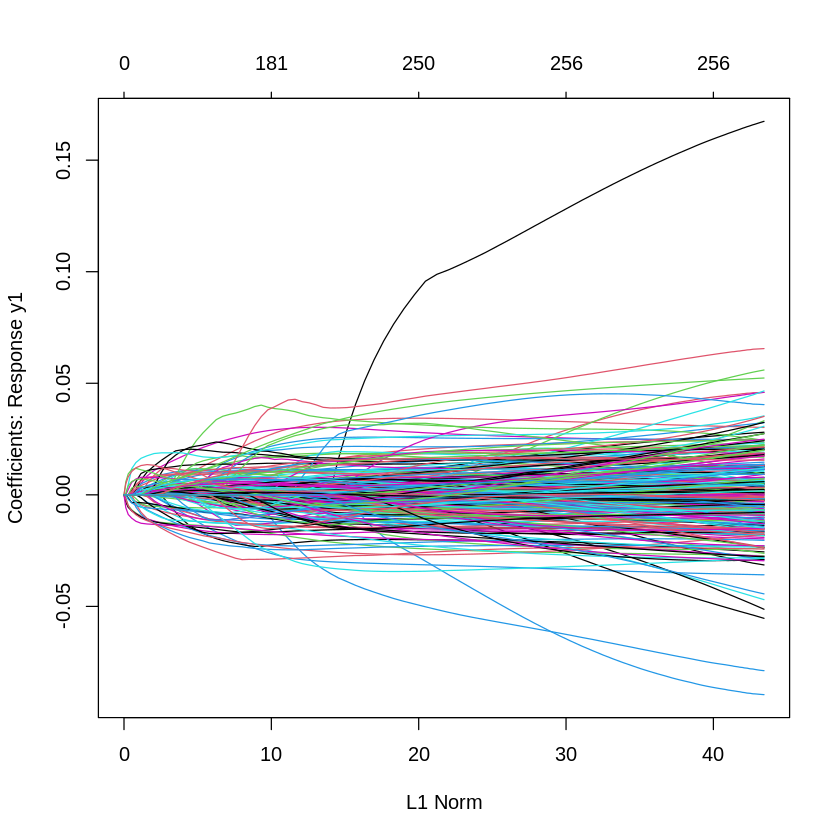

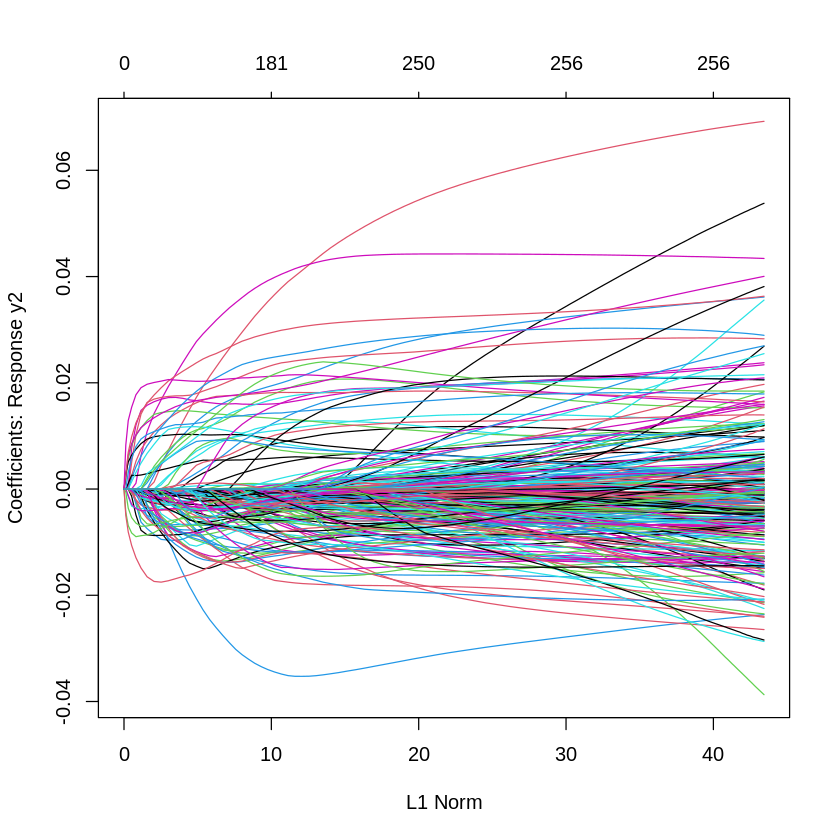

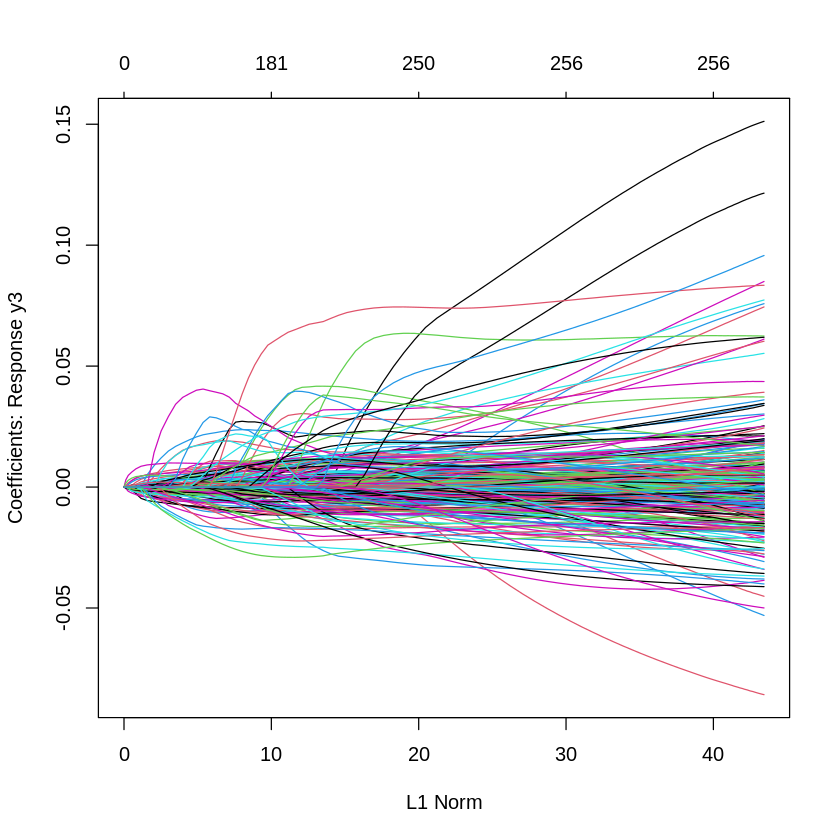

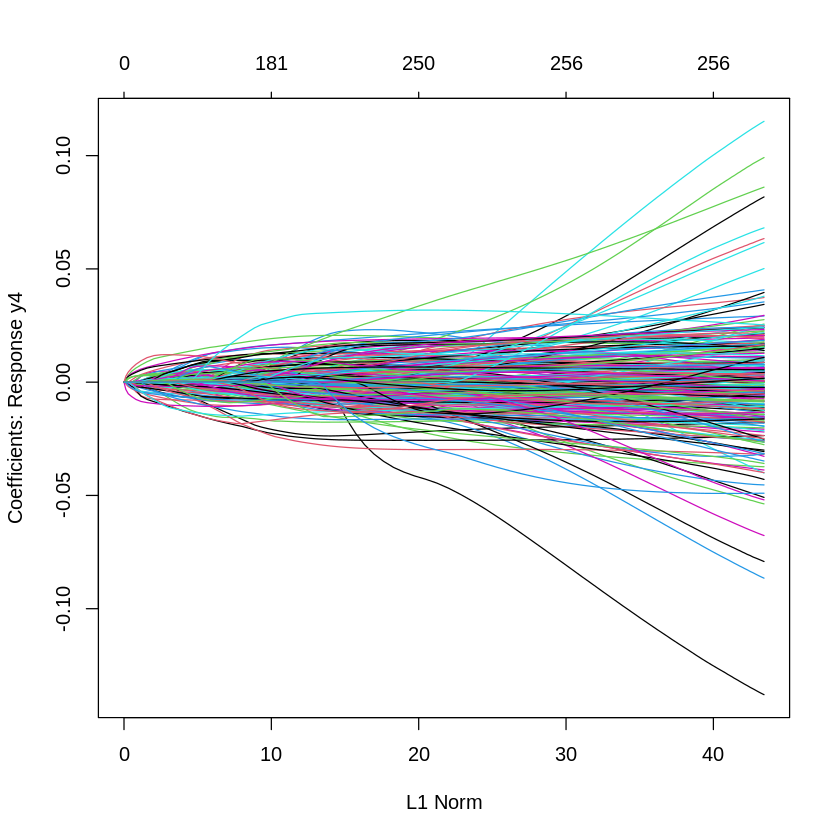

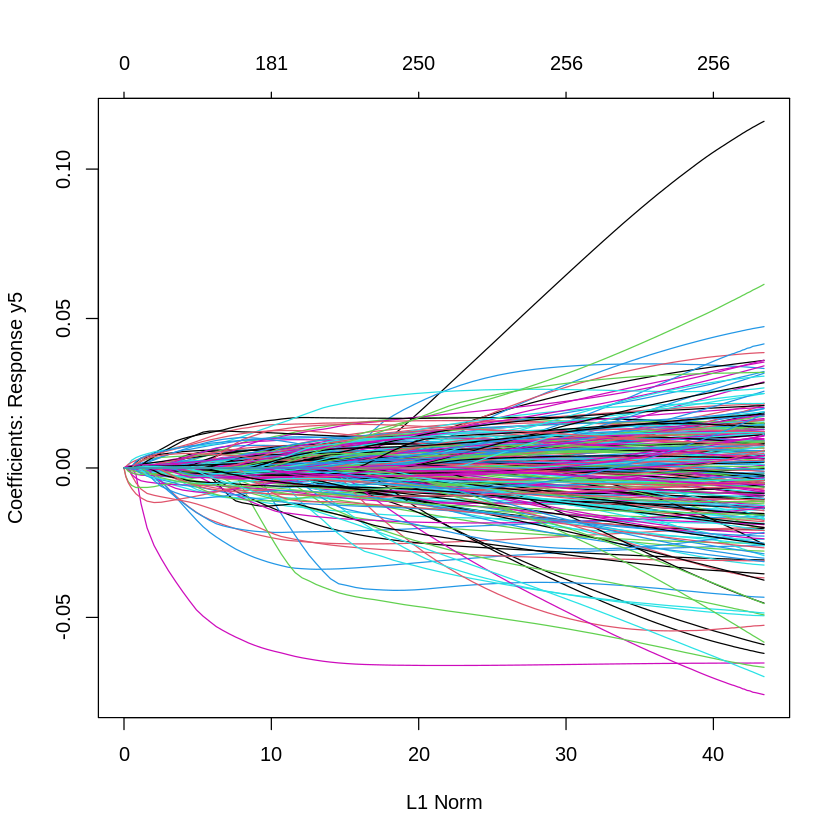

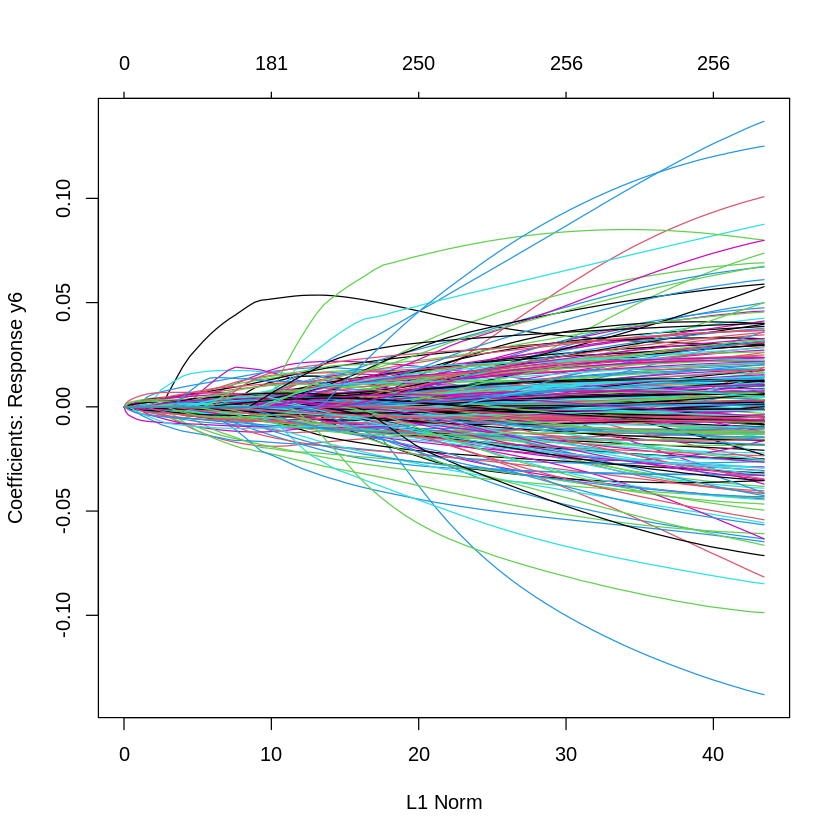

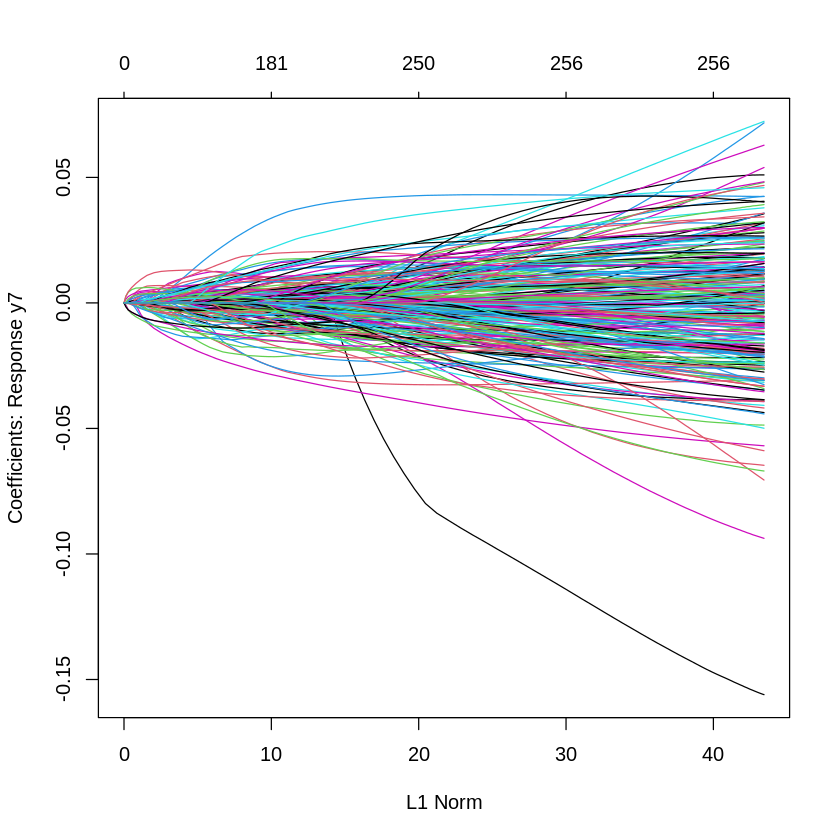

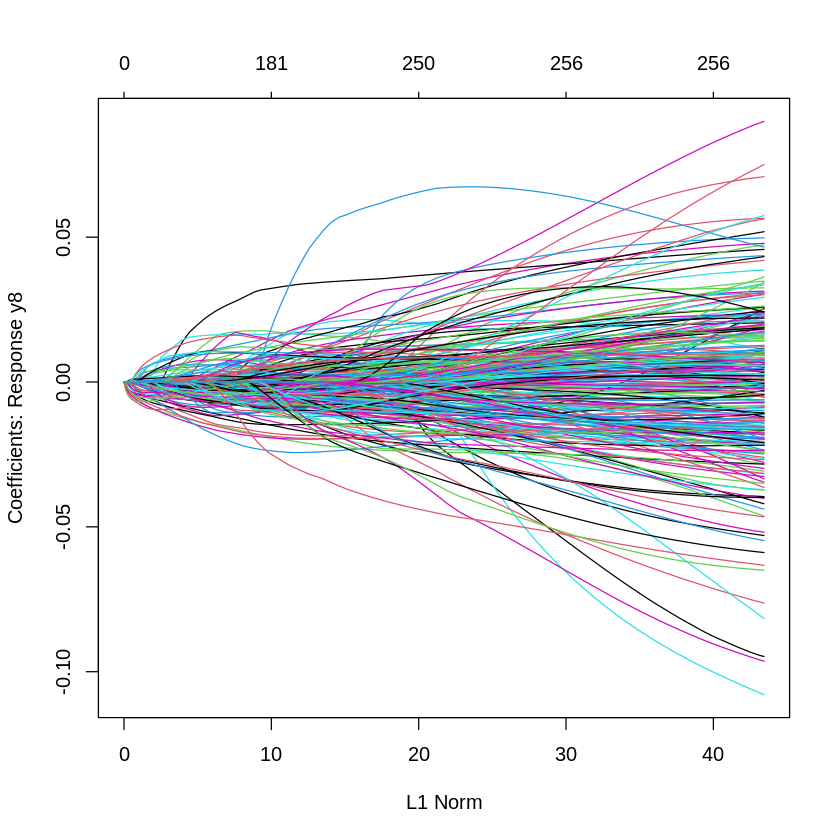

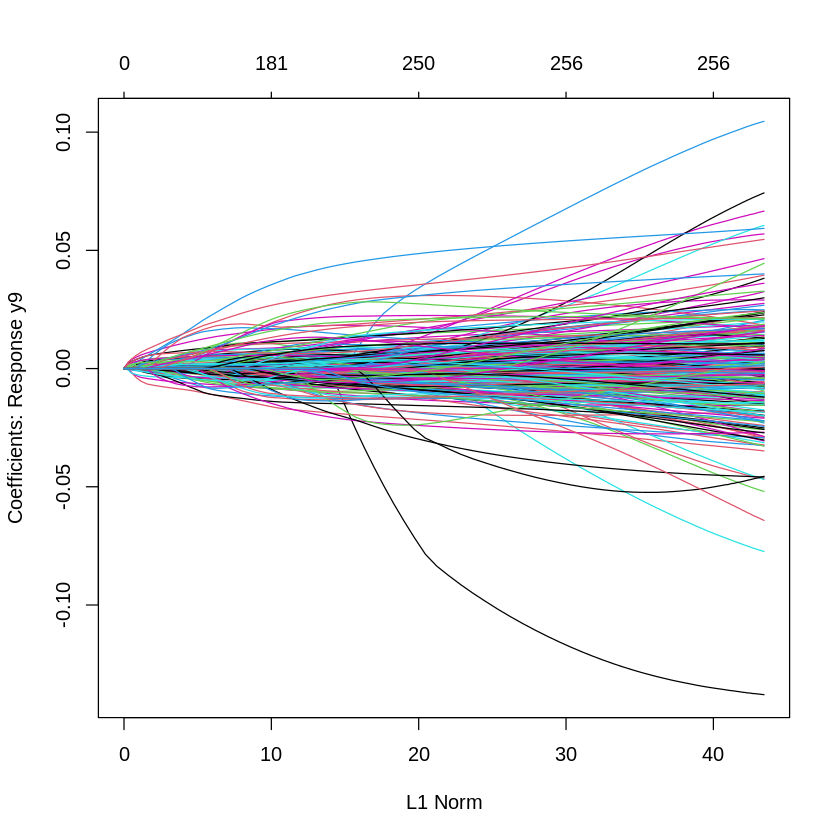

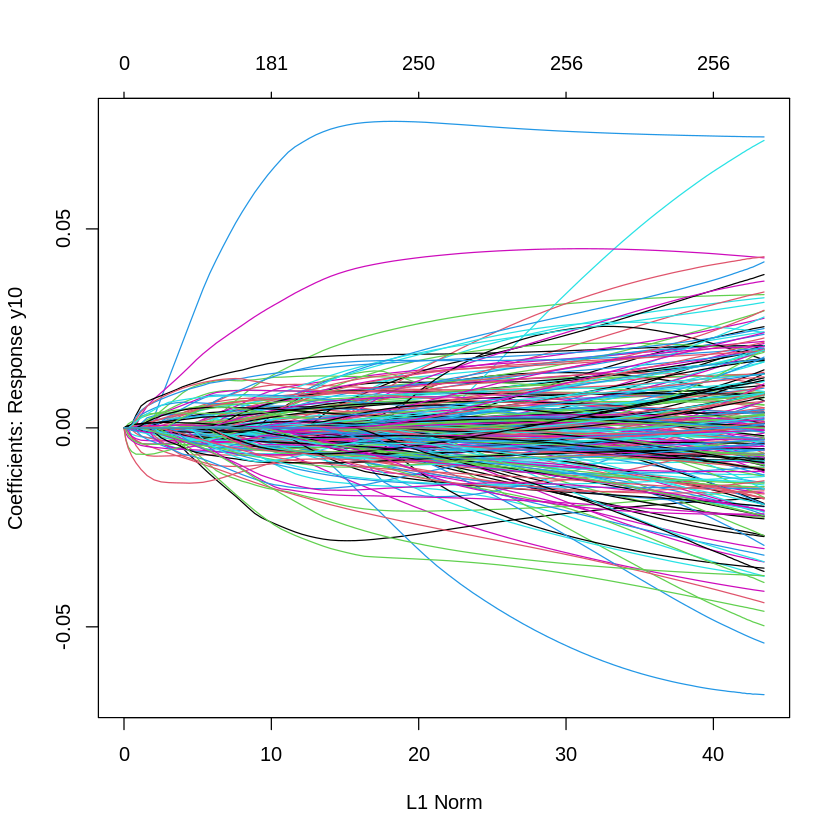

In [ ]:
preds <- predict(fit.elastic, xtest, lambda = lambda)
plot(fit.elastic)

In [ ]:
#7b) ----elastic multiclass linear logistic regression

fit.logistic = glmnet(xtrain, ytrain, family = "multinomial", alpha = 0.3)

logistic_preds <- predict(fit.logistic, xtest, type = "response")
tt=table(logistic_preds,ytest)
err = sum(tt[row(tt) != col(tt)]) / sum(tt)
print(err)

ERROR: ignored

In [ ]:
logistic_preds <- predict(fit.logistic, xtest, type = "response")
logistic_preds

ERROR: ignored